# Cálculo de la duración de un proyecto usando el Método de Montecarlo

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib notebook

### Introducción de datos del proyecto

In [23]:
duration_distribution_parameters = pd.DataFrame(data={'A': [10, 1.5],
                                                      'B': [ 5, 0.4],
                                                      'C': [ 6, 0.8],
                                                      'D': [ 2, 0.7],
                                                      'E': [ 7, 1.8],
                                                      'F': [ 8, 0.8],
                                                      'G': [ 4, 1.4],
                                                      'H': [ 7, 1.6],
                                                      'f1':[ 0, 0.0],
                                                      'f2':[ 0, 0.0],
                                                     },
                                                index=['mean', 'stdev']  )
activity_names = duration_distribution_parameters.columns

In [24]:
duration_distribution_parameters

,A,B,C,D,E,F,G,H,f1,f2
mean,10.0,5.0,6.0,2.0,7.0,8.0,4.0,7.0,0.0,0.0
stdev,1.5,0.4,0.8,0.7,1.8,0.8,1.4,1.6,0.0,0.0


### Generación aleatoria de las duraciones de las actividades

In [37]:
number_of_samples = 1000

In [38]:

duration = pd.DataFrame([np.random.normal(size = number_of_samples,
                                          loc  = duration_distribution_parameters.loc['mean', task],
                                          scale= duration_distribution_parameters.loc['stdev',task])
                         for task in activity_names
                        ],
                        index=activity_names).T

In [45]:
duration.head()

,A,B,C,D,E,F,G,H,f1,f2
0,8.850476,4.550505,5.700362,1.465541,4.398383,8.843069,5.690754,8.933323,0.0,0.0
1,11.197386,5.316609,5.834078,2.258371,5.667792,7.626666,5.010316,5.154459,0.0,0.0
2,7.598076,4.947039,6.219185,2.408695,8.785879,8.645614,3.614844,11.088808,0.0,0.0
3,10.177384,5.197379,5.663079,3.003972,6.606993,8.338824,3.132511,9.113772,0.0,0.0
4,10.628459,4.601742,5.844350,1.038232,7.285768,7.175285,1.730500,8.097745,0.0,0.0


### Cálculo de los tiempos tempranos

In [40]:
t_early = pd.DataFrame()
t_early['nodo_0'] = np.zeros(number_of_samples)
t_early['nodo_1'] = t_early['nodo_0'] + duration['A'] 
t_early['nodo_2'] = t_early['nodo_0'] + duration['B']
t_early['nodo_3'] = pd.DataFrame( { 'input_D':  t_early['nodo_1'] + duration['D'] ,
                                    'input_f2': t_early['nodo_2'] + duration['f2']
                                  }).max(axis=1)
t_early['nodo_4'] = pd.DataFrame( { 'input_C':  t_early['nodo_1'] + duration['C'] ,
                                    'input_f1': t_early['nodo_3'] + duration['f1']
                                  }).max(axis=1)
t_early['nodo_5'] = pd.DataFrame( { 'input_E': t_early['nodo_4'] + duration['E'] ,
                                    'input_F': t_early['nodo_3'] + duration['F']
                                  }).max(axis=1)
t_early['nodo_6'] = pd.DataFrame( { 'input_G': t_early['nodo_5'] + duration['G'] ,
                                    'input_H': t_early['nodo_2'] + duration['H']
                                  }).max(axis=1)

In [46]:
t_early.head()

,nodo_0,nodo_1,nodo_2,nodo_3,nodo_4,nodo_5,nodo_6
0,0.0,8.850476,4.550505,10.316017,14.550838,19.159086,24.849840
1,0.0,11.197386,5.316609,13.455758,17.031465,22.699257,27.709573
2,0.0,7.598076,4.947039,10.006771,13.817261,22.603140,26.217984
3,0.0,10.177384,5.197379,13.181356,15.840463,22.447456,25.579967
4,0.0,10.628459,4.601742,11.666691,16.472809,23.758577,25.489077


### Visualización y caracterización de la distribución de la duración del proyecto 

<IPython.core.display.Javascript object>


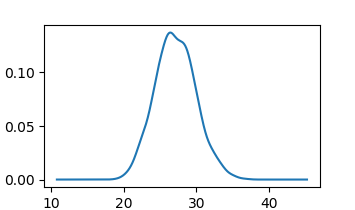

In [50]:
t_early['nodo_6'].plot(kind='density')

In [48]:
t_early['nodo_6'].describe()

count    1000.000000
mean       27.147364
std         2.762264
min        19.427750
25%        25.212858
50%        27.055699
75%        28.966053
max        36.628664
Name: nodo_6, dtype: float64